
## Lab 1 (Проведение исследований с алгоритмом KNN)
### Выполнил: Черевичин Е.В.
---



Настраиваем import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error,explained_variance_score, r2_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.datasets import make_classification




# Выбранный датасет Financial Risk for Loan Approval Для задачи классификации KNN

Kagle: https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval

---
Причина выбора данного датасета:
 - Мир финансов занимает важную роль в жизни современного человека, считаю что данный дата сет решает актуальную проблему  
 - Возможность быстро обрабатываеть и тестировать данные, данный датасет не большого размера (что может сказаться на точности, но большие датасеты будут тяжело обучаться на моем ноутбуке)  
 - Датасет находился в открытом доступе
 - Включает в себя разные типы данных, тем самым предоставляя возможность поработать с разными методами обработки.



In [ ]:
data = pd.read_csv('financial_risk_loan_approval.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


## Подготовим данны для классификации

In [ ]:
classification_features = [
    'Age', 'AnnualIncome', 'CreditScore', 'LoanAmount',
    'LoanDuration', 'DebtToIncomeRatio', 'MonthlyDebtPayments'
]
classification_target = 'LoanApproved'

### Преобразование целевой переменной
LoanApproved: 0 - отклонено, 1 - одобрено

In [ ]:
le = LabelEncoder()
data[classification_target] = le.fit_transform(data[classification_target])

### Разделение данных

In [ ]:
X_classification = data[classification_features]
y_classification = data[classification_target]

### Разделяем данные на тестовую и обучающую выборку

In [ ]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

### Масштабирование данных

In [ ]:
scaler = StandardScaler()
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)


### Обучение KNN для классификации

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_cls_scaled, y_train_cls)

KNeighborsClassifier()

## Предсказание

In [ ]:
y_pred_cls = knn_classifier.predict(X_test_cls_scaled)

### Метрики качества для классификации

In [ ]:
accuracy = accuracy_score(y_test_cls, y_pred_cls)
f1 = f1_score(y_test_cls, y_pred_cls)

print(f"Baseline Classification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Baseline Classification Metrics:
Accuracy: 0.8570
F1 Score: 0.6891


## Улучшение baseline

In [ ]:
from sklearn.model_selection import GridSearchCV

### Подбор гиперпараметров

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [ ]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_cls_scaled, y_train_cls)

print(f"Best Parameters: {grid_search.best_params_}")
best_knn_classifier = grid_search.best_estimator_

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}


### Предсказания с улучшенной моделью

In [ ]:
y_pred_cls_improved = best_knn_classifier.predict(X_test_cls_scaled)

### Метрики качества для улучшенной классификации

In [ ]:
accuracy_improved = accuracy_score(y_test_cls, y_pred_cls_improved)
f1_improved = f1_score(y_test_cls, y_pred_cls_improved)

print(f"Improved Classification Metrics:")
print(f"Accuracy: {accuracy_improved:.4f}")
print(f"F1 Score: {f1_improved:.4f}")

Improved Classification Metrics:
Accuracy: 0.8615
F1 Score: 0.6915


### Построение матрицы путаницы

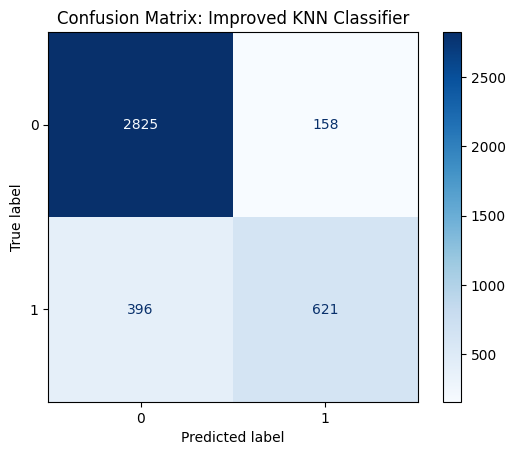

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_knn_classifier, X_test_cls_scaled, y_test_cls, cmap='Blues')
plt.title('Confusion Matrix: Improved KNN Classifier')
plt.show()

## Выводы
После начального обучения модели KNN с базовыми параметрами, такие метрики, как Accuracy и F1 Score, дали приемлемые результаты. Однако базовый подход не учитывал индивидуальных особенностей задачи и ограничивался использованием стандартных гиперпараметров

Матрица путаницы показывает, что количество ошибок классификации значительно сократилось, а большинство объектов были правильно классифицированы.

# Задача Регресии KNN
----

In [ ]:
laptop_df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')
laptop_df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
label_encoders = {}
for column in ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Gpu', 'OpSys']:
    le = LabelEncoder()
    laptop_df[column] = le.fit_transform(laptop_df[column])
    label_encoders[column] = le

### Удаляем лишние столбцы

In [ ]:
laptop_df.drop(['Memory','laptop_ID','Ram','Weight'], axis=1, inplace=True)
laptop_df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Gpu,OpSys,Price_euros
0,1,300,4,13.3,23,65,58,8,1339.69
1,1,301,4,13.3,1,63,51,8,898.94
2,7,50,3,15.6,8,74,53,4,575.00
3,1,300,4,15.4,25,85,9,8,2537.45
4,1,300,4,13.3,23,67,59,8,1803.60


### Маштабируем значения

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(laptop_df.drop(['Price_euros'], axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=laptop_df.columns[:-1])

### Добавление целевой переменной

In [ ]:
data_scaled['Price_euros'] = laptop_df['Price_euros']
data_scaled

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Gpu,OpSys,Price_euros
0,-1.333189,-0.047766,1.138779,-1.204407,1.747762,-0.475914,0.153493,3.083616,1339.69
1,-1.333189,-0.041946,1.138779,-1.204407,-1.043399,-0.555339,-0.170358,3.083616,898.94
2,0.136477,-1.502761,0.335406,0.408772,-0.155303,-0.118498,-0.077829,-0.781657,575.00
3,-1.333189,-0.047766,1.138779,0.268495,2.001504,0.318342,-2.113462,3.083616,2537.45
4,-1.333189,-0.047766,1.138779,-1.204407,1.747762,-0.396488,0.199757,3.083616,1803.60
...,...,...,...,...,...,...,...,...,...
1298,0.871310,1.581829,-2.074710,-0.713439,0.479052,0.477194,-0.355416,0.184661,638.00
1299,0.871310,1.628389,-2.074710,-1.204407,1.240278,0.477194,-0.355416,0.184661,1499.00
1300,0.871310,-0.653044,0.335406,-0.713439,-1.170270,-1.707010,-0.679266,0.184661,229.00
1301,0.136477,-1.782120,0.335406,0.408772,-1.170270,0.477194,-1.558290,0.184661,764.00


### Разделение данных


In [ ]:
X = data_scaled.drop('Price_euros', axis=1)
y = data_scaled['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Создание модели

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsRegressor()

## Предсказание и оценка

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"MAPE: {mape:.2f}%")

MAE: 290.44578544061307
MSE: 221421.86028467433
R²: 0.5640671445813243
MAPE: 29.96%


## Улучшение безлайна

In [ ]:
laptop_greater_baseline_df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')

### Прероцессинг данных

### Обработаем Ram, Memory, Weight
-  Ram убираем kg и меняем тип на int
- Weight убираем kg и меняем тип на float
- Memory парсим текстовые данные в два числовых категориальных признака

In [ ]:
laptop_greater_baseline_df['Ram'] = laptop_greater_baseline_df['Ram'].str.replace('GB', '').astype(int)
laptop_greater_baseline_df['Weight'] = laptop_greater_baseline_df['Weight'].str.replace('kg', '').astype(float)

In [ ]:
import re
def parse_memory(memory):
    ssd, hdd = 0, 0

    # Разделяем строку на компоненты по шаблону "<число><тип памяти>"
    components = re.findall(r'(\d+(?:\.?\d*)?)\s*(GB|TB)\s*(SSD|HDD|Flash Storage)?', memory)

    for component in components:
        size, unit, storage_type = component

        size_in_gb = float(size) * 1024 if unit == 'TB' else float(size)

        if 'SSD' in (storage_type or '') or 'Flash Storage' in (storage_type or ''):
            ssd += size_in_gb
        elif 'HDD' in (storage_type or ''):
            hdd += size_in_gb

    return pd.Series([int(ssd), int(hdd)])

### Обработка категориальных признаков

In [ ]:
label_encoders = {}
for column in ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Gpu', 'OpSys']:
    le = LabelEncoder()
    laptop_greater_baseline_df[column] = le.fit_transform(laptop_greater_baseline_df[column])
    label_encoders[column] = le

In [ ]:
laptop_greater_baseline_df[['SSD', 'HDD']] = laptop_greater_baseline_df['Memory'].apply(parse_memory)

### Введем комплексный признак


In [ ]:
laptop_greater_baseline_df['SSD_per_kg'] = laptop_greater_baseline_df['SSD'] / laptop_greater_baseline_df['Weight']
laptop_greater_baseline_df['HDD_per_kg'] = laptop_greater_baseline_df['HDD'] / laptop_greater_baseline_df['Weight']

### Удаляем лишние столбцы

In [ ]:
laptop_greater_baseline_df.drop(['Memory','laptop_ID'], axis=1, inplace=True)
laptop_greater_baseline_df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,SSD_per_kg,HDD_per_kg
0,1,300,4,13.3,23,65,8,58,8,1.37,1339.69,128,0,93.430657,0.0
1,1,301,4,13.3,1,63,8,51,8,1.34,898.94,128,0,95.522388,0.0
2,7,50,3,15.6,8,74,8,53,4,1.86,575.00,256,0,137.634409,0.0
3,1,300,4,15.4,25,85,16,9,8,1.83,2537.45,512,0,279.781421,0.0
4,1,300,4,13.3,23,67,8,59,8,1.37,1803.60,256,0,186.861314,0.0


### Маштабируем значения

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(laptop_greater_baseline_df.drop(['Price_euros'], axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=laptop_greater_baseline_df.columns[:-1])

### Добавление целевой переменной и логарифмирование

In [ ]:
data_scaled['Price_euros'] = np.log1p(laptop_greater_baseline_df['Price_euros'])
data_scaled

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,SSD_per_kg
0,-1.333189,-0.047766,1.138779,-1.204407,1.747762,-0.475914,-0.075195,0.153493,3.083616,-1.005283,7.200940,-0.800444,-0.126811,-0.781379
1,-1.333189,-0.041946,1.138779,-1.204407,-1.043399,-0.555339,-0.075195,-0.170358,3.083616,-1.050381,6.802328,-0.800444,-0.110087,-0.781379
2,0.136477,-1.502761,0.335406,0.408772,-0.155303,-0.118498,-0.075195,-0.077829,-0.781657,-0.268684,6.356108,-0.800444,0.226593,-0.781379
3,-1.333189,-0.047766,1.138779,0.268495,2.001504,0.318342,1.498767,-2.113462,3.083616,-0.313782,7.839309,-0.800444,1.363040,-0.781379
4,-1.333189,-0.047766,1.138779,-1.204407,1.747762,-0.396488,-0.075195,0.199757,3.083616,-1.005283,7.498094,-0.800444,0.620156,-0.781379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0.871310,1.581829,-2.074710,-0.713439,0.479052,0.477194,-0.862176,-0.355416,0.184661,-0.358880,6.459904,-0.800444,-0.305252,-0.781379
1299,0.871310,1.628389,-2.074710,-1.204407,1.240278,0.477194,1.498767,-0.355416,0.184661,-1.110512,7.313220,-0.800444,2.274973,-0.781379
1300,0.871310,-0.653044,0.335406,-0.713439,-1.170270,-1.707010,-1.255667,-0.679266,0.184661,-0.809859,5.438079,-0.800444,-0.532662,-0.781379
1301,0.136477,-1.782120,0.335406,0.408772,-1.170270,0.477194,-0.468686,-1.558290,0.184661,0.227393,6.639876,1.139671,-0.873777,1.249290


### Разделение данных

In [ ]:
X = data_scaled.drop('Price_euros', axis=1)
y = data_scaled['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Создание модели

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsRegressor()

## Предсказание и оценка

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"MAPE: {mape:.2f}%")

MAE: 0.1992670177627925
MSE: 0.07457061837134189
R²: 0.7890601483815123
MAPE: 2.92%


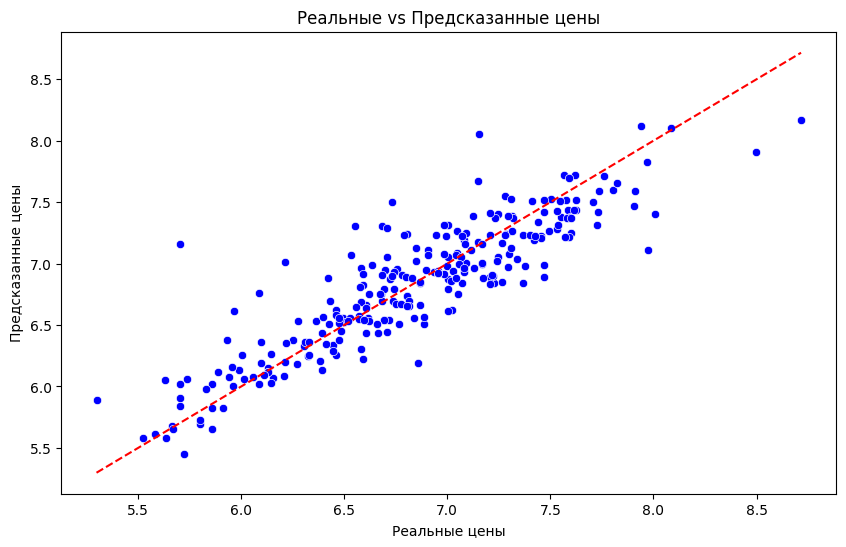

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Реальные vs Предсказанные цены')
plt.xlabel('Реальные цены')
plt.ylabel('Предсказанные цены')
plt.show()

## Выводы
Было замечено улучшение следующих метрик:
- MAE (Mean Absolute Error): Уменьшение абсолютной средней ошибки указывает на повышение точности предсказаний.
- MSE (Mean Squared Error): Снижение квадратичной ошибки демонстрирует уменьшение крупных отклонений в предсказаниях.
- R² (Коэффициент детерминации): Увеличение значения указывает на лучшее соответствие модели данным.
- MAPE (Mean Absolute Percentage Error): Снижение средней абсолютной процентной ошибки подтверждает увеличение точности.

### Общая интерпретация:
После улучшения базовой модели метрики модели стали демонстрировать лучшую точность. Это подтверждает гипотезу о том, что добавление новых признаков, учет соотношений, логарифмирование и корректный препроцессинг данных способны значительно повысить качество регрессионной модели.


# Имплементирование алгоритмов
----

## Имплементация алгоритма KNN классификации


In [ ]:
import numpy as np

class KNNClassifier:
    def __init__(self, k=5):
        """
        Инициализация модели KNN.
        :param k: количество ближайших соседей для классификации
        """
        self.k = k  # Количество соседей

    def fit(self, X, y):
        """
        Обучение модели KNN.
        :param X: Признаки обучающего набора
        :param y: Целевые значения для обучающего набора
        """
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        """
        Прогнозирование для новых данных.
        :param X: Признаки тестового набора
        :return: Прогнозируемые классы
        """
        predictions = [] # Список для хранения прогнозов
        for x in np.array(X):
            distances = np.linalg.norm(self.X_train - x, axis=1)  # Евклидово расстояние
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_indices]
            predicted_label = np.bincount(k_nearest_labels).argmax()
            predictions.append(predicted_label)

        return np.array(predictions)  # Возвращаем массив предсказанных классов

### Подготовка данных для обучение имплементированной модели на обычном baseline

In [ ]:
data = pd.read_csv('financial_risk_loan_approval.csv')

classification_features = [
    'Age', 'AnnualIncome', 'CreditScore', 'LoanAmount',
    'LoanDuration', 'DebtToIncomeRatio', 'MonthlyDebtPayments'
]
classification_target = 'LoanApproved'

le = LabelEncoder()
data[classification_target] = le.fit_transform(data[classification_target])

X_classification = data[classification_features]
y_classification = data[classification_target]

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

In [ ]:
knn_baseline = KNNClassifier(k=5)
knn_baseline.fit(X_train_cls_scaled, y_train_cls)

y_pred_baseline = knn_baseline.predict(X_test_cls_scaled)

### Метрики

In [ ]:
accuracy_baseline = accuracy_score(y_test_cls, y_pred_baseline)
f1_baseline = f1_score(y_test_cls, y_pred_baseline)
print(f"Baseline Classification Metrics:")
print(f"Accuracy: {accuracy_baseline:.4f}")
print(f"F1 Score: {f1_baseline:.4f}")

Baseline Classification Metrics:
Accuracy: 0.8570
F1 Score: 0.6891


### Улучшайем baseline

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

class ImprovedKNNClassifier:
    def __init__(self, k=5, weighted=True):
        """
        Улучшенный KNN-классификатор.
        :param k: Количество ближайших соседей
        :param weighted: Использовать ли веса соседей
        """
        self.k = k
        self.weighted = weighted
        self.scaler = StandardScaler()

    def fit(self, X, y):
        """
        Обучение модели.
        :param X: Признаки обучающего набора
        :param y: Целевые значения
        """
        self.X_train = self.scaler.fit_transform(X)
        self.y_train = np.array(y)

    def predict(self, X):
        """
        Прогнозирование для новых данных.
        :param X: Признаки тестового набора
        :return: Прогнозируемые классы
        """
        X_test = self.scaler.transform(X)
        predictions = []
        for x in X_test:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_indices]

            if self.weighted:
                weights = 1 / (distances[k_indices] + 1e-5)  # Для предотвращения деления на ноль
                predicted_label = np.bincount(k_nearest_labels, weights=weights).argmax()
            else:
                predicted_label = np.bincount(k_nearest_labels).argmax()

            predictions.append(predicted_label)

        return np.array(predictions)

    def tune_k(self, X, y, k_values):
        """
        Подбор оптимального значения k.
        :param X: Признаки обучающего набора
        :param y: Целевые значения
        :param k_values: Список возможных значений k
        :return: Оптимальное значение k
        """
        X_scaled = self.scaler.fit_transform(X)
        best_k = None
        best_score = 0
        for k in k_values:
            self.k = k
            preds = self.predict(X_scaled)
            score = accuracy_score(y, preds)
            if score > best_score:
                best_score = score
                best_k = k
        self.k = best_k
        return best_k

    def evaluate(self, X, y):
        """
        Оценка модели с использованием точности и F1-метрики.
        :param X: Признаки тестового набора
        :param y: Целевые значения
        :return: Точность и F1-метрика
        """
        preds = self.predict(X)
        accuracy = accuracy_score(y, preds)
        f1 = f1_score(y, preds, average='weighted')
        return accuracy, f1

### Масштабируйте данные

In [ ]:
X, y = make_classification(n_samples=500, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Создайте и обучите модель

In [ ]:
knn = ImprovedKNNClassifier(k=5, weighted=True)
knn.fit(X_train, y_train)

### Найдите оптимальное значение k

In [ ]:
best_k = knn.tune_k(X_train, y_train, k_values=range(3, 20))
print(f"Лучшее значение k: {best_k}")

Лучшее значение k: 4


### Обучение

In [ ]:
predictions = knn.predict(X_test)

### Метрики

In [ ]:
accuracy, f1 = knn.evaluate(X_test, y_test)
print(f"Точность модели: {accuracy}")
print(f"F1-метрика модели: {f1}")

Точность модели: 0.87
F1-метрика модели: 0.8698820445609436


Ввыводы
- Имплементация данного алгоритма обучения оказалось не сложной, метрики для данного алгоритма демострируют одинаковый результат(на уровне погрешности)
- ImprovedKNNClassifier демонтсрирует лучшие показатели по всем моделям.
  - В ImprovedKNNClassifier используется стандартизация признаков с помощью StandardScaler. Это улучшает точность и F1-метрику, особенно если признаки имеют разные масштабы
  - ImprovedKNNClassifier учитывает веса соседей, что позволяет более близким точкам в пространстве признаков оказывать большее влияние на итоговое предсказани
  - ImprovedKNNClassifier включает функцию подбора оптимального значения k


## Имплементация алгоритма KNN регресия

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

class KNNRegressor:
    def __init__(self, k=5):
        """
        Инициализация модели KNN для регрессии.
        :param k: количество ближайших соседей для регрессии
        """
        self.k = k  # Количество соседей

    def fit(self, X, y):
        """
        Обучение модели KNN.
        :param X: Признаки обучающего набора
        :param y: Целевые значения для обучающего набора
        """
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        """
        Прогнозирование для новых данных.
        :param X: Признаки тестового набора
        :return: Прогнозируемые значения
        """
        predictions = []  # Список для хранения прогнозов
        X = np.array(X)  # Преобразуем X в numpy массив, если это еще не так

        for x in X:
            # Ensure both arrays are numeric before calculating distances
            # Convert to float if possible, or handle non-numeric data appropriately

            X_train_numeric = np.array(self.X_train, dtype=np.float64)
            x_numeric = np.array(x, dtype=np.float64)

            distances = np.linalg.norm(X_train_numeric - x_numeric, axis=1)  # Евклидово расстояние
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_values = self.y_train[k_indices]
            predicted_value = np.mean(k_nearest_values)
            predictions.append(predicted_value)

        return np.array(predictions)

In [ ]:
laptop_df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')
laptop_df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


### Работа с данными

In [ ]:
laptop_df = pd.get_dummies(laptop_df, drop_first=True)

features = laptop_df.drop(columns=['Price_euros'])
target = laptop_df['Price_euros']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Обучение модели

In [ ]:
knn_regressor = KNNRegressor(k=5)
knn_regressor.fit(X_train, y_train)

### Прогнозирование данных

In [ ]:
predictions = knn_regressor.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")

MAE: 540.5711
MSE: 576113.4637
R²: -0.1342
MAPE: 68.23%


## Улучшение Baseline

In [ ]:
laptop_greater_baseline_df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')

### Прероцессинг данных

### Обработаем Ram, Memory, Weight
-  Ram убираем kg и меняем тип на int
- Weight убираем kg и меняем тип на float
- Memory парсим текстовые данные в два числовых категориальных признака

In [ ]:
laptop_greater_baseline_df['Ram'] = laptop_greater_baseline_df['Ram'].str.replace('GB', '').astype(int)
laptop_greater_baseline_df['Weight'] = laptop_greater_baseline_df['Weight'].str.replace('kg', '').astype(float)

In [ ]:
import re
def parse_memory(memory):
    ssd, hdd = 0, 0

    # Разделяем строку на компоненты по шаблону "<число><тип памяти>"
    components = re.findall(r'(\d+(?:\.?\d*)?)\s*(GB|TB)\s*(SSD|HDD|Flash Storage)?', memory)

    for component in components:
        size, unit, storage_type = component

        size_in_gb = float(size) * 1024 if unit == 'TB' else float(size)

        if 'SSD' in (storage_type or '') or 'Flash Storage' in (storage_type or ''):
            ssd += size_in_gb
        elif 'HDD' in (storage_type or ''):
            hdd += size_in_gb

    return pd.Series([int(ssd), int(hdd)])

### Обработка категориальных признаков

In [ ]:
label_encoders = {}
for column in ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Gpu', 'OpSys']:
    le = LabelEncoder()
    laptop_greater_baseline_df[column] = le.fit_transform(laptop_greater_baseline_df[column])
    label_encoders[column] = le

In [ ]:
laptop_greater_baseline_df[['SSD', 'HDD']] = laptop_greater_baseline_df['Memory'].apply(parse_memory)

### Введем комплексный признак


In [ ]:
laptop_greater_baseline_df['SSD_per_kg'] = laptop_greater_baseline_df['SSD'] / laptop_greater_baseline_df['Weight']
laptop_greater_baseline_df['HDD_per_kg'] = laptop_greater_baseline_df['HDD'] / laptop_greater_baseline_df['Weight']

### Удаляем лишние столбцы

In [ ]:
laptop_greater_baseline_df.drop(['Memory','laptop_ID'], axis=1, inplace=True)
laptop_greater_baseline_df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,SSD_per_kg,HDD_per_kg
0,1,300,4,13.3,23,65,8,58,8,1.37,1339.69,128,0,93.430657,0.0
1,1,301,4,13.3,1,63,8,51,8,1.34,898.94,128,0,95.522388,0.0
2,7,50,3,15.6,8,74,8,53,4,1.86,575.00,256,0,137.634409,0.0
3,1,300,4,15.4,25,85,16,9,8,1.83,2537.45,512,0,279.781421,0.0
4,1,300,4,13.3,23,67,8,59,8,1.37,1803.60,256,0,186.861314,0.0


### Маштабируем значения

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(laptop_greater_baseline_df.drop(['Price_euros'], axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=laptop_greater_baseline_df.columns[:-1])

In [ ]:
data_scaled['Price_euros'] = np.log1p(laptop_greater_baseline_df['Price_euros'])
data_scaled

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,SSD_per_kg
0,-1.333189,-0.047766,1.138779,-1.204407,1.747762,-0.475914,-0.075195,0.153493,3.083616,-1.005283,7.200940,-0.800444,-0.126811,-0.781379
1,-1.333189,-0.041946,1.138779,-1.204407,-1.043399,-0.555339,-0.075195,-0.170358,3.083616,-1.050381,6.802328,-0.800444,-0.110087,-0.781379
2,0.136477,-1.502761,0.335406,0.408772,-0.155303,-0.118498,-0.075195,-0.077829,-0.781657,-0.268684,6.356108,-0.800444,0.226593,-0.781379
3,-1.333189,-0.047766,1.138779,0.268495,2.001504,0.318342,1.498767,-2.113462,3.083616,-0.313782,7.839309,-0.800444,1.363040,-0.781379
4,-1.333189,-0.047766,1.138779,-1.204407,1.747762,-0.396488,-0.075195,0.199757,3.083616,-1.005283,7.498094,-0.800444,0.620156,-0.781379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0.871310,1.581829,-2.074710,-0.713439,0.479052,0.477194,-0.862176,-0.355416,0.184661,-0.358880,6.459904,-0.800444,-0.305252,-0.781379
1299,0.871310,1.628389,-2.074710,-1.204407,1.240278,0.477194,1.498767,-0.355416,0.184661,-1.110512,7.313220,-0.800444,2.274973,-0.781379
1300,0.871310,-0.653044,0.335406,-0.713439,-1.170270,-1.707010,-1.255667,-0.679266,0.184661,-0.809859,5.438079,-0.800444,-0.532662,-0.781379
1301,0.136477,-1.782120,0.335406,0.408772,-1.170270,0.477194,-0.468686,-1.558290,0.184661,0.227393,6.639876,1.139671,-0.873777,1.249290


### Разделение данных

In [ ]:
X = data_scaled.drop('Price_euros', axis=1)
y = data_scaled['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
knn_regressor = KNNRegressor(k=5)
knn_regressor.fit(X_train, y_train)

### Прогнозирование данных

In [ ]:
predictions = knn_regressor.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")

MAE: 0.1991
MSE: 0.0744
R²: 0.7895
MAPE: 2.92%


# 2 Lab (Проведение исследований с логистической и линейной регрессией)

In [ ]:
data = pd.read_csv('financial_risk_loan_approval.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


## Подготовим данны для классификации

In [ ]:
classification_features = [
    'Age', 'AnnualIncome', 'CreditScore', 'LoanAmount',
    'LoanDuration', 'DebtToIncomeRatio', 'MonthlyDebtPayments'
]
classification_target = 'LoanApproved'

### Преобразование целевой переменной
LoanApproved: 0 - отклонено, 1 - одобрено

In [ ]:
le = LabelEncoder()
data[classification_target] = le.fit_transform(data[classification_target])

### Разделение данных

In [ ]:
X_classification = data[classification_features]
y_classification = data[classification_target]

### Разделяем данные на тестовую и обучающую выборку

In [ ]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

### Масштабирование данных

In [ ]:
scaler = StandardScaler()
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)
